In [1]:
# Import libraries
# Linear algebra
import numpy as np
# Data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
py.init_notebook_mode(connected=True)

# Import the 3 dimensionality reduction methods
# Principal Component Analysis - Unsupervised, linear method
from sklearn.decomposition import PCA
# Linear Discriminant Analysis - Supervised, linear method
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# t-distributed Stochastic Neighbour Embedding - Nonlinear, probabilistic method
from sklearn.manifold import TSNE

# The term "Curse of Dimensionality" has been oft been thrown about,
# especially when PCA, LDA and TSNE is thrown into the mix.

In [2]:
train = pd.read_csv('train.csv')
print(train.shape)
train.sample(3)

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10933,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21514,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


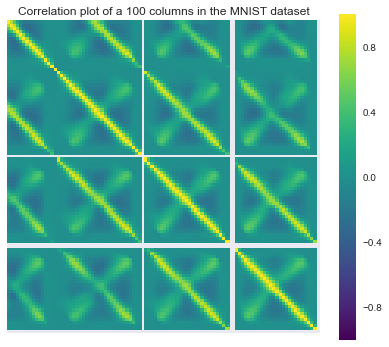

In [3]:
# Pearson Correlation Plot

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 6))
plt.title('Correlation plot of a 100 columns in the MNIST dataset')
# Draw the heatmap using seaborn
sns.heatmap(train.iloc[:,350:450].astype(float).corr(), linewidths=0, square=True,
            cmap="viridis", xticklabels=False, yticklabels=False, annot=True)

# These therefore represent groupings where the ones and zeros of these columns
# probably contribute to the same digit.

In [4]:
target = train['label']
train.drop('label', axis=1, inplace=True)
print(train.shape)
print(target.shape)

(42000, 784)
(42000,)


In [5]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(train.values.astype(float))

# One of the most intuitive explanations of eigenvectors of a covariance matrix
# is that they are the directions in which the data varies the most.
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x:x[0], reverse=True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [6]:
trace1 = go.Scatter(
    x=list(range(784)),
    y=cum_var_exp,
    mode='lines+markers',
    name='Cumulative Explained Variance',
    hoverinfo= cum_var_exp,
    line=dict(shape='spline', color='goldenrod')
)
trace2 = go.Scatter(
    x=list(range(784)),
    y= var_exp,
    mode='lines+markers',
    name='Individual Explained Variance',
    hoverinfo= var_exp,
    line=dict(shape='linear', color='black')
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.5}], print_grid=True)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2,1,1)
fig.layout.title = 'Explained Variance plots - Full and Zoomed-in'
fig.layout.xaxis = dict(range=[0, 80], title = 'Feature columns')
fig.layout.yaxis = dict(range=[0, 60], title = 'Explained Variance')
fig['data'] += [go.Scatter(x=list(range(784)) , y=cum_var_exp,
                           xaxis='x2', yaxis='y2', name = 'Cumulative Explained Variance')]
fig['data'] += [go.Scatter(x=list(range(784)), y=var_exp,
                           xaxis='x2', yaxis='y2', name = 'Individual Explained Variance')]
py.iplot(fig, filename='inset example')

# As we can see, out of our 784 features or columns approximately 90% of the Explained Variance
# can be described by using just over 200 over features.

This is the format of your plot grid:
[ (1,1) x1,y1 ]

With insets:
[ x2,y2 ] over [ (1,1) x1,y1 ]



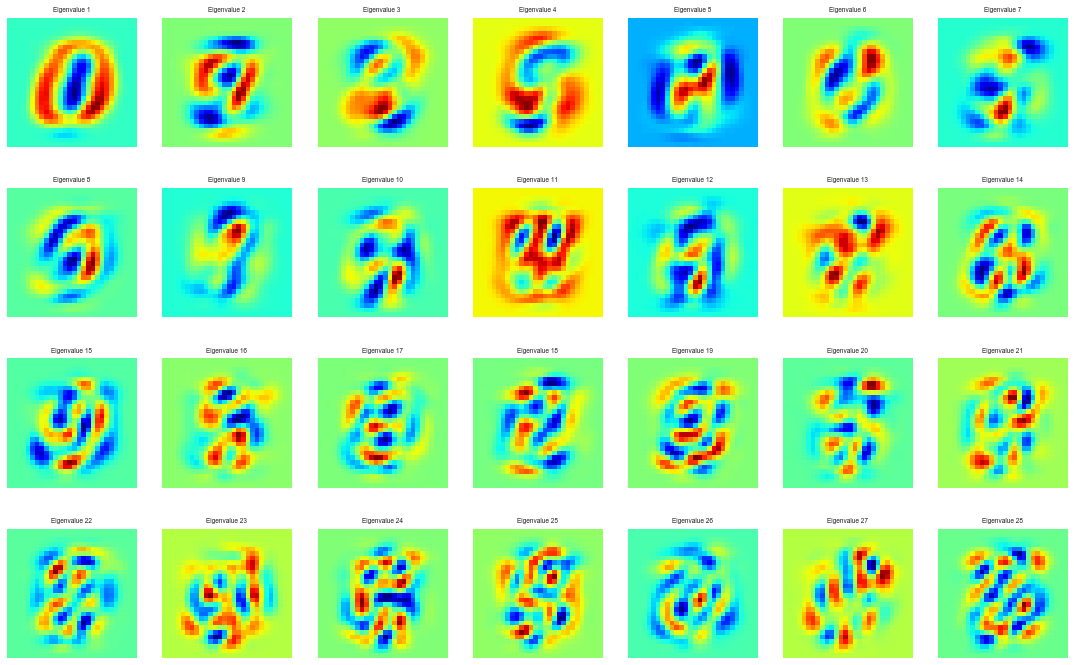

In [7]:
# Invoke SKlearn's PCA method
pca = PCA(n_components=28).fit(train.values)
eigenvalues = pca.components_
plt.figure(figsize=(19, 12))
for i in list(range(28)):
    offset=0
    plt.subplot(4, 7, i + 1)
    plt.imshow(eigenvalues[i].reshape(28, 28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

# It is obvious that more complicated directions or components are being generated
# in the search to maximise variance in the new feature subspace.

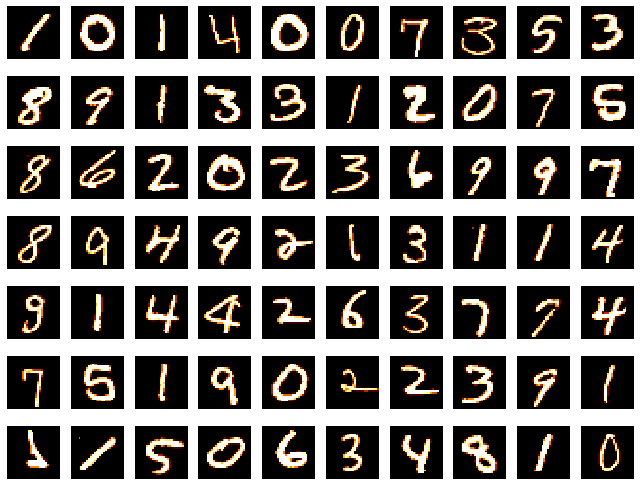

In [8]:
# plot some of the numbers
plt.figure(figsize=(9, 7))
for digit_num in range(70):
    plt.subplot(7, 10, digit_num+1)
    grid_data = train.iloc[digit_num].as_matrix().reshape(28,28)
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

In [9]:
X_std = StandardScaler().fit_transform(train[:2000].values.astype(float))
target = target[:2000]

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_std)

In [10]:
trace = go.Scatter(
    x = X_2d[:,0],
    y = X_2d[:,1],
    name = target,
    hoveron = target,
    mode = 'markers',
    text = target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = target,
        colorscale = 'Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)

layout = go.Layout(
    title='Principal Component Analysis (PCA)',
    hovermode='closest',
    xaxis=dict(
        title='First Principal Component',
        ticklen=5,
        zeroline=False,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Second Principal Component',
        ticklen=5,
        gridwidth=2,
    ),
    showlegend=True
)

fig = dict(data=[trace], layout=layout)
py.iplot(fig, filename='styled-scatter')

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9)
X_clustered = kmeans.fit_predict(X_2d)

trace_Kmeans = go.Scatter(
    x=X_2d[:, 0], y=X_2d[:, 1], mode="markers", showlegend=False, marker=dict(
        size=8, color=X_clustered, colorscale='Portland', showscale=False, line=dict(
            width=2, color='rgb(255, 255, 255)'
        )
    )
)

layout = go.Layout(
    title='KMeans Clustering',
    hovermode='closest',
    xaxis=dict(
        title='First Principal Component',
        ticklen=5,
        zeroline=False,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Second Principal Component',
        ticklen=5,
        gridwidth=2,
    ),
    showlegend=True
)

data = [trace_Kmeans]
fig1 = dict(data=data, layout=layout)
py.iplot(fig1, filename="svm")

In [12]:
from IPython.display import display, Math, Latex
lda = LDA(n_components=2)
X_LDA_2D = lda.fit_transform(X_std, target.values)

traceLDA = go.Scatter(
    x = X_LDA_2D[:,0],
    y = X_LDA_2D[:,1],
    name = target,
    mode = 'markers',
    text = target,
    showlegend = True,
    marker = dict(
        size = 8,
        color = target,
        colorscale = 'Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceLDA]

layout = go.Layout(
    title = 'Linear Discriminant Analysis (LDA)',
    hovermode = 'closest',
    xaxis = dict(
        title = 'First Linear Discriminant',
        ticklen = 5,
        zeroline = False,
        gridwidth = 2,
    ),
    yaxis = dict(
        title = 'Second Linear Discriminant',
        ticklen = 5,
        gridwidth = 2,
    ),
    showlegend = False
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:455: UserWarning:

The priors do not sum to 1. Renormalizing

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning:

Variables are collinear.



In [14]:
tsne = TSNE()
tsne_results = tsne.fit_transform(X_std)
traceTSNE = go.Scatter(
    x = tsne_results[:,0],
    y = tsne_results[:,1],
    name = target,
    hoveron = target,
    mode = 'markers',
    text = target,
    showlegend = True,
    marker = dict(
        size = 8,
        color = target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceTSNE]

layout = dict(
    title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
    hovermode = 'closest',
    yaxis = dict(zeroline = False),
    xaxis = dict(zeroline = False),
    showlegend = False,
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')